### Relevante pakker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [2]:
df = pd.read_csv("./dataset/lego.population.csv", sep = ",", encoding = "latin1")

df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [3]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages',  'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

# det er dataset dere skal bruke!
df2

,Set_Name,Theme,Pieces,Price,Pages,Unique_Pieces
2,Creative Blue Bricks,Classic,52.0,4.99,37.0,28.0
3,Creative Green Bricks,Classic,60.0,4.99,37.0,36.0
11,Fire Truck,DUPLO,6.0,6.99,3.0,6.0
12,Tow Truck,DUPLO,7.0,6.99,3.0,7.0
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,52.0
...,...,...,...,...,...,...
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,525.0
1175,Monkie Kid's Team Secret HQ,Monkie Kid,1105.0,169.99,556.0,622.0
1176,Grand Piano,Ideas,3662.0,349.99,564.0,345.0


### Mer eller mindre relevante kodesnutter

In [4]:
# Arrays for each LEGO theme category
populaerkultur = [
    "Star Wars", "Marvel", "Disney", "THE LEGO MOVIE 2", 
    "Minecraft", "Harry Potter", "Jurassic World", 
    "Batman", "DC", "Monkie Kid", "Trolls World Tour", 
    "Overwatch", "LEGO Frozen 2", "Spider-Man", 
    "Powerpuff Girls", "Minions", "Stranger Things"
]

vanlig = [
    "Friends", "City", "NINJAGO", "DUPLO", 
    "Creator 3-in-1", "Technic", "Classic", 
    "Speed Champions", "Creator Expert", 
    "Juniors", "Architecture", "DOTS"
]

uvisst = [
    "BrickHeadz", "Hidden Side", "Ideas", 
    "Powered UP", "Xtra", "Minifigures", "Unikitty"
]

# Funksjon for å tildele kategori basert på arrays
def categorize_brand(theme):
    if theme in populaerkultur:
        return 'Populærkultur'
    elif theme in vanlig:
        return 'Vanlig'
    elif theme in uvist:
        return 'Uvisst'
    else:
        return 'Ukjent'  

# Legg til ny kolonne 'Brand' basert på Theme
df2['Theme_category'] = df2['Theme'].apply(categorize_brand)

print(df2)


                           Set_Name             Theme  Pieces   Price  Pages  \
2              Creative Blue Bricks           Classic    52.0    4.99   37.0   
3             Creative Green Bricks           Classic    60.0    4.99   37.0   
11                       Fire Truck             DUPLO     6.0    6.99    3.0   
12                        Tow Truck             DUPLO     7.0    6.99    3.0   
13     Stephanie's Summer Heart Box           Friends    95.0    7.99   40.0   
...                             ...               ...     ...     ...    ...   
1173     Welcome to Apocalypseburg!  THE LEGO MOVIE 2  3178.0  299.99  452.0   
1174  Jurassic Park: T. rex Rampage    Jurassic World  3120.0  249.99  464.0   
1175    Monkie Kid's Team Secret HQ        Monkie Kid  1105.0  169.99  556.0   
1176                    Grand Piano             Ideas  3662.0  349.99  564.0   
1177        Lamborghini Sián FKP 37           Technic  3696.0  379.99  657.0   

      Unique_Pieces Theme_category  
2 

In [13]:
# Opprett dummy variabler for Theme_category
df2['Populærkultur'] = (df2['Theme_category'] == 'Populærkultur').astype(int)
df2['Uvisst'] = (df2['Theme_category'] == 'Uvisst').astype(int)

# Drop den originale Theme_category hvis ønskelig, men beholder referansekategorien
# df2 = df2.drop(columns=['Theme_category'])

# Vis resultatet
print(df2)

                           Set_Name             Theme  Pieces   Price  Pages  \
2              Creative Blue Bricks           Classic    52.0    4.99   37.0   
3             Creative Green Bricks           Classic    60.0    4.99   37.0   
11                       Fire Truck             DUPLO     6.0    6.99    3.0   
12                        Tow Truck             DUPLO     7.0    6.99    3.0   
13     Stephanie's Summer Heart Box           Friends    95.0    7.99   40.0   
...                             ...               ...     ...     ...    ...   
1173     Welcome to Apocalypseburg!  THE LEGO MOVIE 2  3178.0  299.99  452.0   
1174  Jurassic Park: T. rex Rampage    Jurassic World  3120.0  249.99  464.0   
1175    Monkie Kid's Team Secret HQ        Monkie Kid  1105.0  169.99  556.0   
1176                    Grand Piano             Ideas  3662.0  349.99  564.0   
1177        Lamborghini Sián FKP 37           Technic  3696.0  379.99  657.0   

      Unique_Pieces Theme_category  Pop

In [5]:
# Capture the value counts
print(df2['Theme'].value_counts())

Theme
Star Wars            110
Friends              100
City                  94
NINJAGO               78
DUPLO                 51
Marvel                50
Disney                41
Creator 3-in-1        38
Technic               38
BrickHeadz            31
Minecraft             26
THE LEGO MOVIE 2      26
Harry Potter          22
Jurassic World        20
Classic               20
Hidden Side           19
Speed Champions       17
Batman                16
Creator Expert        15
Juniors               12
Ideas                 12
Architecture          11
Trolls World Tour      9
Monkie Kid             9
DC                     9
DOTS                   8
Overwatch              8
LEGO Frozen 2          8
Unikitty               6
Powered UP             4
Xtra                   4
Minifigures            3
Powerpuff Girls        2
Minions                2
Spider-Man             2
Stranger Things        1
Name: count, dtype: int64


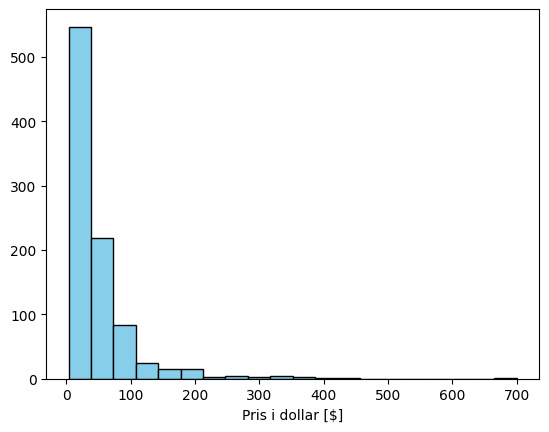

In [6]:
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

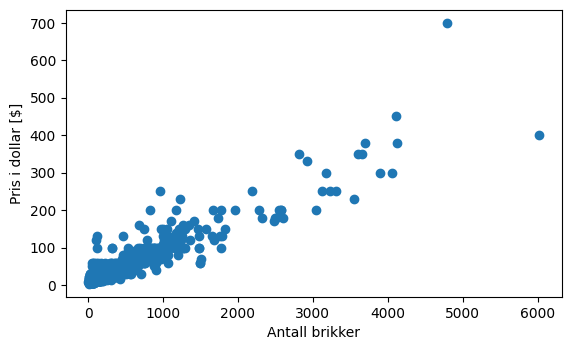

In [7]:
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

In [8]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2['Price'].idxmax()])

Set_Name          Imperial Star Destroyer
Theme                           Star Wars
Pieces                             4784.0
Price                              699.99
Pages                               444.0
Unique_Pieces                       445.0
Theme_category              Populærkultur
Name: 825, dtype: object


In [9]:
# og hvilket har flest brikker?
print(df2.loc[df2['Pieces'].idxmax()])

Set_Name          Hogwarts Castle
Theme                Harry Potter
Pieces                     6020.0
Price                      399.99
Pages                       636.0
Unique_Pieces               624.0
Theme_category      Populærkultur
Name: 821, dtype: object


In [10]:
# hvilke tema har de billigste settene?
df2.groupby('Theme')['Price'].mean().sort_values(ascending=True)[:3]

Theme
Xtra            3.990000
Minifigures    12.990000
BrickHeadz     13.731935
Name: Price, dtype: float64

In [11]:
# hvilke tema har flest brikker?
df2.groupby('Theme')['Pieces'].mean().sort_values(ascending=False)[:3]

Theme
Stranger Things    2287.0
Powered UP         2113.5
Creator Expert     1958.8
Name: Pieces, dtype: float64

In [12]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Theme, Treatment("Star Wars"))' , data = subset_df)
modell3_mlr_alt.fit().summary()

NameError: name 'subset_df' is not defined

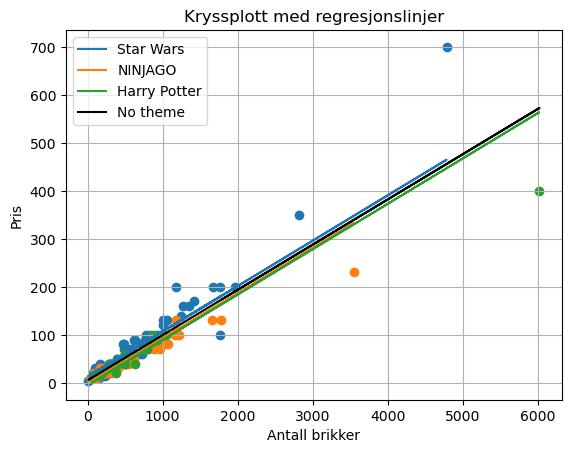

In [55]:
# plott
intercept = [modell3_mlr.fit().params['Theme[T.Star Wars]'], modell3_mlr.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'No theme')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [57]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces*Theme' , data = subset_df)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     833.8
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.23e-133
Time:                        15:08:27   Log-Likelihood:                -866.62
No. Observations:                 210   AIC:                             1745.
Df Residuals:                     204   BIC:                             1765.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.8126      3.841      4.378      0.000       9.240      24.385
Theme[T.NINJAGO]             -8.9357      4.441     -2.012      0.046     -17.691      -0.180
Theme[T.Star Wars]          -20.5063      4.257     -4.817      0.000     -28.900     -12.113
Pieces                        0.0652      0.003     23.877      0.000       0.060       0.071
Pieces:Theme[T.NINJAGO]       0.0053      0.004      1.253      0.212      -0.003       0.014
Pieces:Theme[T.Star Wars]     0.0628      0.004     17.512      0.000       0.056       0.070
==============================================================================
Omnibus:                      126.015   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6524.151
Skew:                          -1.494   Prob(JB):                         0.00
Kurtosis:                      30.142   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

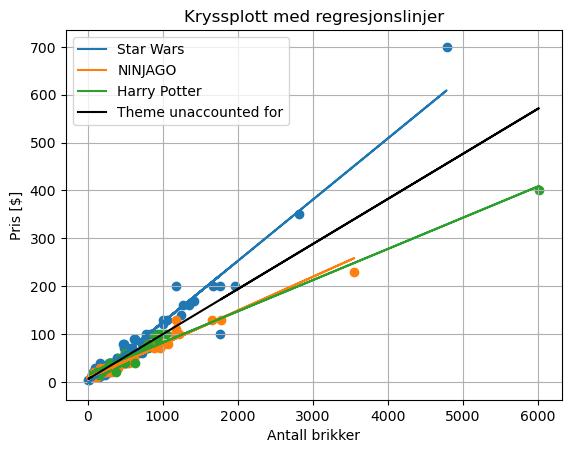

In [59]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.Star Wars]'], modell3_mlri.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Pieces:Theme[T.Star Wars]'], modell3_mlri.fit().params['Pieces:Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

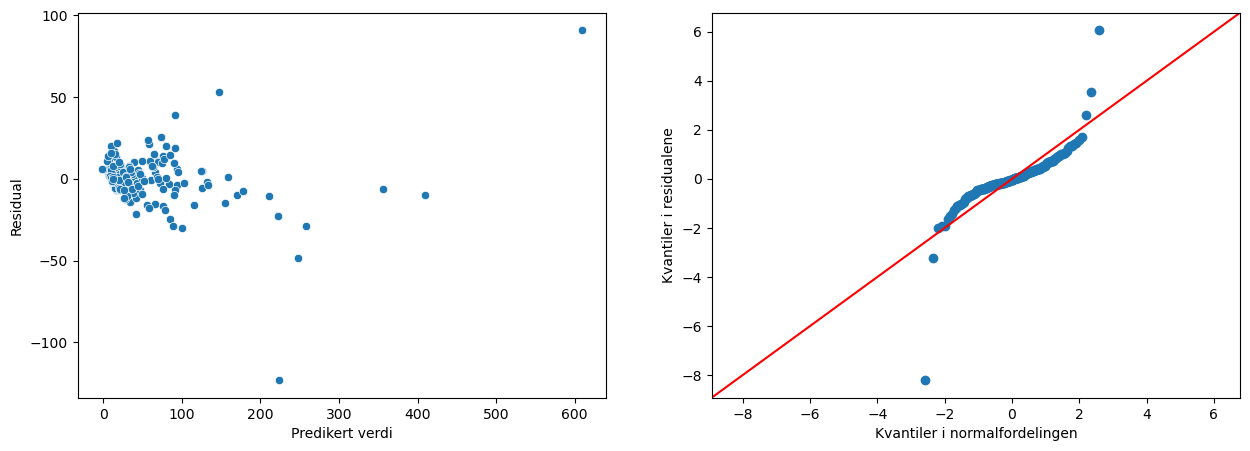

In [61]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [63]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2['Theme'].isin(['Harry Potter', 'NINJAGO', 'Star Wars']), 'Cat1', 
                      np.where(df2['Theme'].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

,cat,Count
0,Cat1,210
1,Cat2,194
2,Cat3,518


In [65]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')

,cat,Theme,Count
0,Cat1,Harry Potter,22
1,Cat1,NINJAGO,78
2,Cat1,Star Wars,110
3,Cat2,City,94
4,Cat2,Friends,100
5,Cat3,Architecture,11
6,Cat3,Batman,16
7,Cat3,BrickHeadz,31
8,Cat3,Classic,20
9,Cat3,Creator 3-in-1,38
